#Project Overview




*   About Dataset： Sephora products and customer reviews
*   Data source：sephora.com
*   Period it represents: March 2023
*   Goal:

  1.   Discover the most popular products and brands.
  2.   Find the factors that influence product ratings.
  3.   Find a perfect skin care product for myself





---




# D1 Library imports

##1. Install the kaggle library

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##2. Authenticate

In [ ]:
%env KAGGLE_USERNAME=qiyuchen777
%env KAGGLE_KEY=0e9b77676f00e2cd147d602144ad0ef4

env: KAGGLE_USERNAME=qiyuchen777
env: KAGGLE_KEY=0e9b77676f00e2cd147d602144ad0ef4


##3. Fetch the data

In [ ]:
!kaggle datasets download -d nadyinky/sephora-products-and-skincare-reviews

 96% 167M/175M [00:03<00:00, 57.1MB/s]
100% 175M/175M [00:03<00:00, 46.5MB/s]


In [ ]:
!unzip /content/sephora-products-and-skincare-reviews.zip

Archive:  /content/sephora-products-and-skincare-reviews.zip
  inflating: product_info.csv        
  inflating: reviews_0_250.csv       
  inflating: reviews_1000_1500.csv   
  inflating: reviews_1500_end.csv    
  inflating: reviews_250_500.csv     
  inflating: reviews_500_750.csv     
  inflating: reviews_750_1000.csv    


In [ ]:
# Import the unzipped .csv files to dataframes using pandas
import pandas as pd
product_info = pd.read_csv("/content/product_info.csv", header=0)

#Merge all review forms
R1 = pd.read_csv("/content/reviews_0_250.csv", header=0)
R2 = pd.read_csv("/content/reviews_250_500.csv", header=0)
R3 = pd.read_csv("/content/reviews_500_750.csv", header=0)
R4 = pd.read_csv("/content/reviews_750_1000.csv", header=0)
R5 = pd.read_csv("/content/reviews_1000_1500.csv", header=0)
R6 = pd.read_csv("/content/reviews_1500_end.csv", header=0)

merged_RV = pd.concat([R1,R2,R3,R4,R5,R6])

<ipython-input-6-5d1f44f138cb>:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  R1 = pd.read_csv("/content/reviews_0_250.csv", header=0)
<ipython-input-6-5d1f44f138cb>:10: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  R5 = pd.read_csv("/content/reviews_1000_1500.csv", header=0)
<ipython-input-6-5d1f44f138cb>:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  R6 = pd.read_csv("/content/reviews_1500_end.csv", header=0)


## Install NLU API

In [ ]:
pip install --upgrade google-cloud-language

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir("/content/drive/MyDrive/_2023_DWD")
!export GOOGLE_APPLICATION_CREDENTIALS="/content/drive/MyDrive/_2023_DWD/my-final-project-385402-ce910d3aebc1.json"
!gcloud auth activate-service-account --key-file /content/drive/MyDrive/_2023_DWD/my-final-project-385402-ce910d3aebc1.json
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/drive/MyDrive/_2023_DWD/my-final-project-385402-ce910d3aebc1.json"

Activated service account credentials for: [nlp-318@my-final-project-385402.iam.gserviceaccount.com]


#D2 Data Pre-Processing

In [ ]:
product_info.shape

(8494, 27)

In [ ]:
merged_RV.shape

(1301136, 19)

In [ ]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [ ]:
merged_RV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1301136 entries, 0 to 49976
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1301136 non-null  int64  
 1   author_id                 1301136 non-null  object 
 2   rating                    1301136 non-null  int64  
 3   is_recommended            1107162 non-null  float64
 4   helpfulness               631670 non-null   float64
 5   total_feedback_count      1301136 non-null  int64  
 6   total_neg_feedback_count  1301136 non-null  int64  
 7   total_pos_feedback_count  1301136 non-null  int64  
 8   submission_time           1301136 non-null  object 
 9   review_text               1299520 non-null  object 
 10  review_title              930754 non-null   object 
 11  skin_tone                 1103798 non-null  object 
 12  eye_color                 1057734 non-null  object 
 13  skin_type                 117

##Subset the data

In [ ]:
merged_RV.drop(['Unnamed: 0','helpfulness','skin_tone','eye_color'],axis=1,inplace=True)
product_info.drop(['size','variation_type','variation_value','variation_desc','value_price_usd','sale_price_usd','new','out_of_stock','child_count','child_max_price','child_min_price','tertiary_category'],axis=1,inplace=True)


##Check for Null Values

In [ ]:
product_info.isnull().values.any()

True

In [ ]:
merged_RV.isnull().values.any()

True

##Drop records with null values

In [ ]:
#Drop NaN val in product_info
product_info = product_info.dropna()
product_info.shape

(5619, 15)

In [ ]:
#Drop the rows in the merged_RV table whose product_id is not included in the product_info table
product_ids = set(product_info['product_id'].tolist())
merged_RV = merged_RV[merged_RV['product_id'].isin(product_ids)].reset_index(drop=True)

##Convert data type

In [ ]:
merged_RV['submission_time'] = pd.to_datetime(merged_RV['submission_time'])

#D3 Data analysis

##Dataframe Overview

In [ ]:
product_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 8490
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          5619 non-null   object 
 1   product_name        5619 non-null   object 
 2   brand_id            5619 non-null   int64  
 3   brand_name          5619 non-null   object 
 4   loves_count         5619 non-null   int64  
 5   rating              5619 non-null   float64
 6   reviews             5619 non-null   float64
 7   ingredients         5619 non-null   object 
 8   price_usd           5619 non-null   float64
 9   limited_edition     5619 non-null   int64  
 10  online_only         5619 non-null   int64  
 11  sephora_exclusive   5619 non-null   int64  
 12  highlights          5619 non-null   object 
 13  primary_category    5619 non-null   object 
 14  secondary_category  5619 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 702.4+

In [ ]:
merged_RV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149629 entries, 0 to 1149628
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   author_id                 1149629 non-null  object        
 1   rating                    1149629 non-null  int64         
 2   is_recommended            1001259 non-null  float64       
 3   total_feedback_count      1149629 non-null  int64         
 4   total_neg_feedback_count  1149629 non-null  int64         
 5   total_pos_feedback_count  1149629 non-null  int64         
 6   submission_time           1149629 non-null  datetime64[ns]
 7   review_text               1148190 non-null  object        
 8   review_title              819843 non-null   object        
 9   skin_type                 1046814 non-null  object        
 10  hair_color                936405 non-null   object        
 11  product_id                1149629 non-null  object

### Note
There are still some null values in the merged_RV table, I will keep them for now and I will decide whether to remove them later in the specific data analysis




##Q1: What are the *Top 500 Hottest Products* according to the number of consumer reviews?

In [ ]:
hot500 = product_info.sort_values(by=['reviews'], ascending=False).head(500)

###Q1.1 What is the distribution of categories?

<Axes: ylabel='primary_category'>

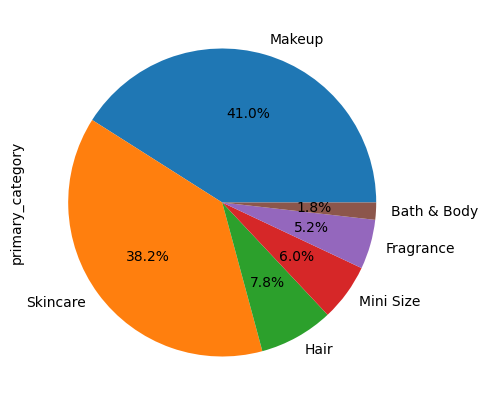

In [ ]:
hot500['primary_category'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(5,5))

###Q1.2 Which brands are these products from??

<Axes: title={'center': 'Top 20 brands of the 500 most popular products'}, xlabel='Number of product'>

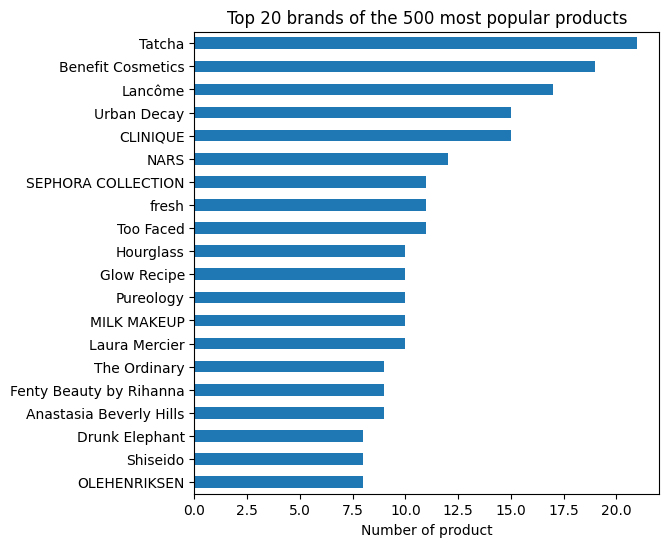

In [ ]:
hot500['brand_name'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh', figsize=(6,6), title="Top 20 brands of the 500 most popular products", xlabel="Number of product")

##Q2 Highlights of the Hottest 500 products

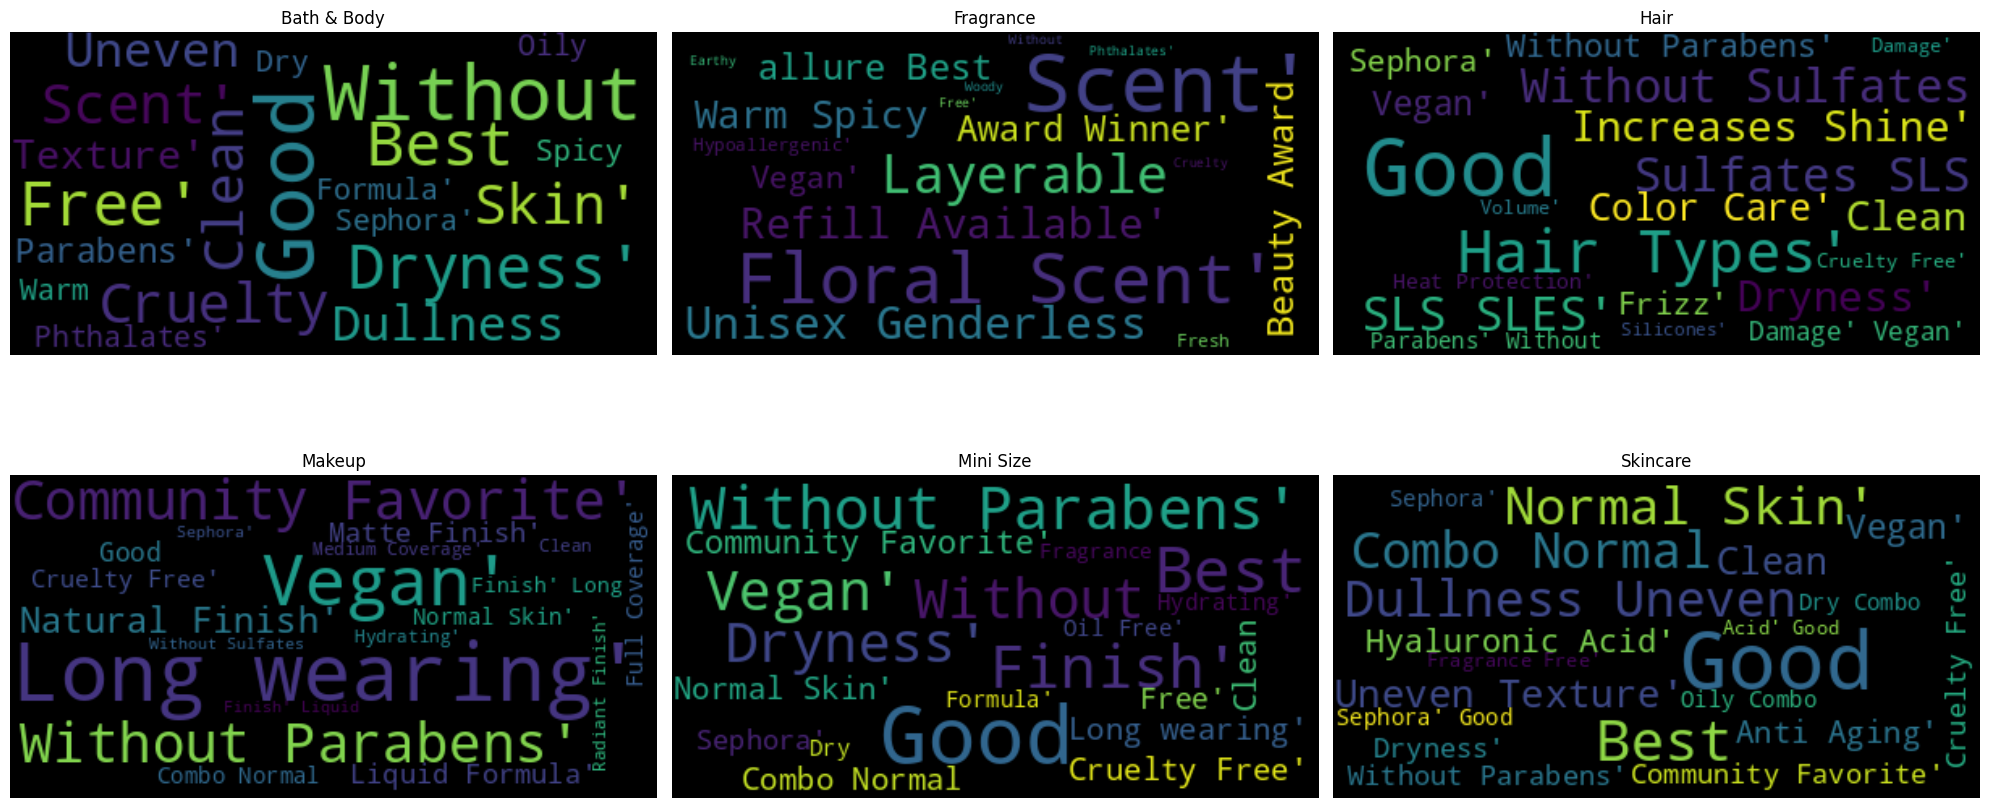

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
for (cat, group), ax in zip(hot500.groupby('primary_category'), axes.flatten()):
    text = ' '.join(group['highlights'])
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="black").generate(text)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(cat)
    ax.axis("off")
plt.tight_layout()

##Q3: Relationship between rating and factors?

###Q3.1 For each category, what is the correlation between rating and price?

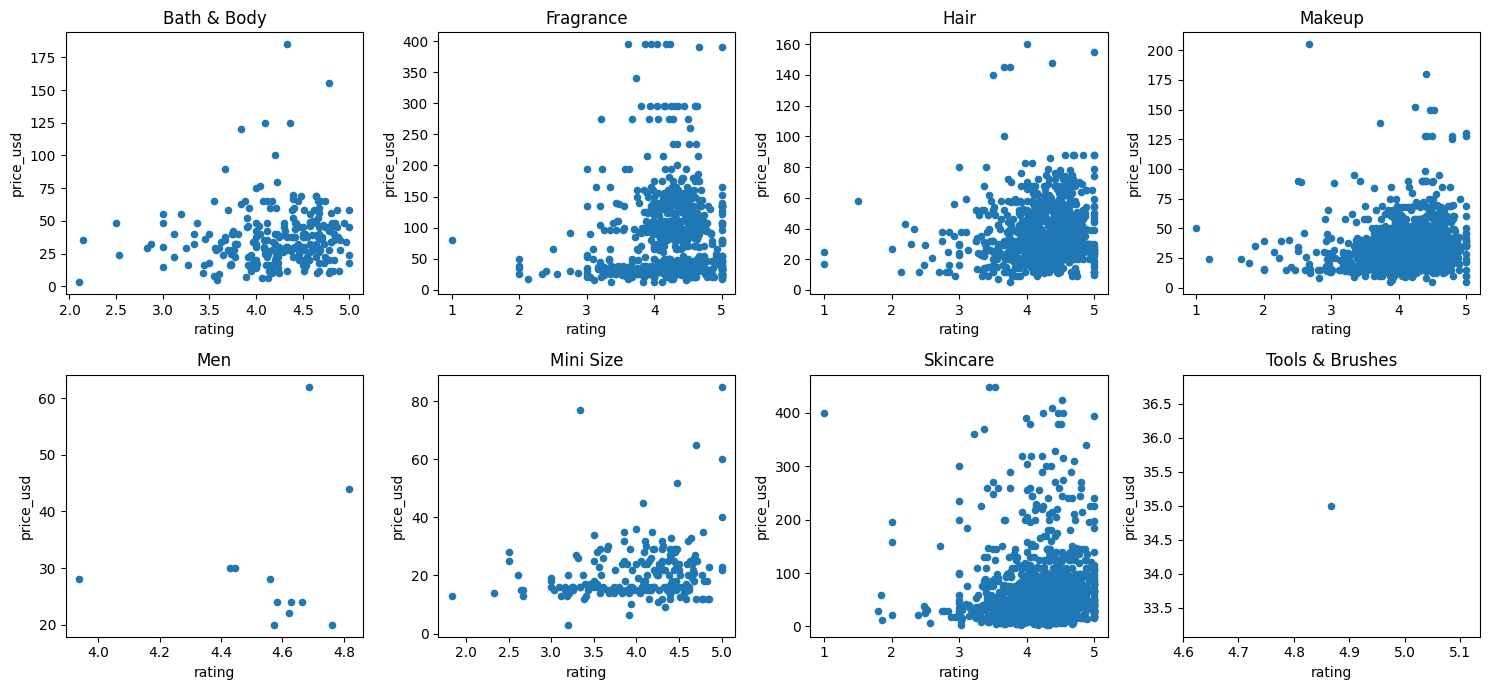

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15,7))
for (cat, group), ax in zip(product_info.groupby('primary_category'), axes.flatten()):
    group.plot(x='rating', y='price_usd', kind='scatter', ax=ax, title=cat)
plt.tight_layout()

###Q3.2 For each category, what is the correlation between rating and brand?

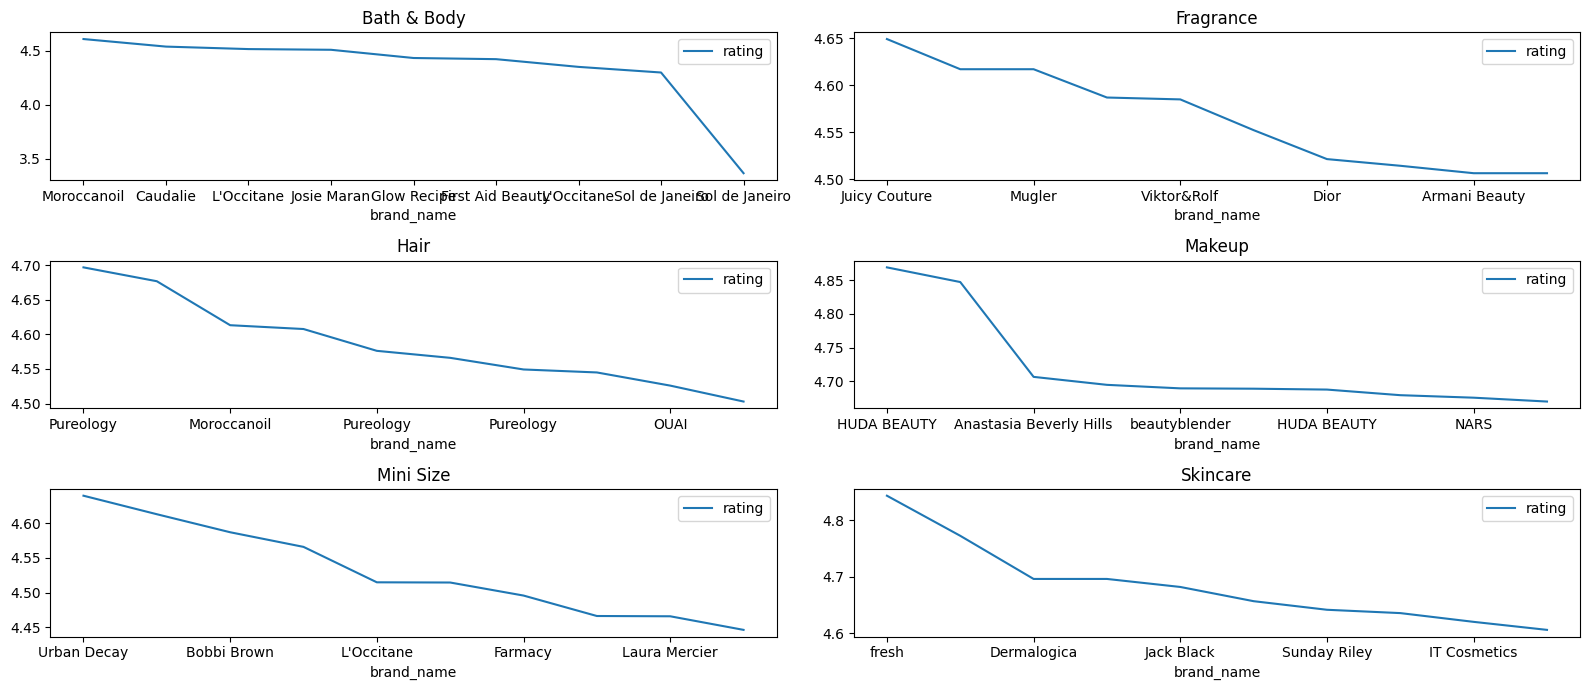

In [ ]:
top10_brand = hot500.groupby('primary_category').apply(lambda x: x.sort_values('rating', ascending=False).head(10)).reset_index(drop=True)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,7))
for (cat, group), ax in zip(top10_brand.groupby('primary_category'), axes.flatten()):
    group.plot(x='brand_name', y='rating', kind='line', ax=ax, title=cat)
plt.tight_layout()

##Q4 What is the attitude of customers with different skin types towards the hottest cleansers?

In [ ]:
# find the hottest cleansers
top1_Cleansers = hot500[(hot500['primary_category'] == 'Skincare') & (hot500['secondary_category'] == 'Cleansers')].sort_values('reviews', ascending=False).head(1)
top1_Cleansers

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,ingredients,price_usd,limited_edition,online_only,sephora_exclusive,highlights,primary_category,secondary_category
2754,P7880,Soy Hydrating Gentle Face Cleanser,4348,fresh,282865,4.3628,8733.0,"['Aqua (Water), Coco-Glucoside, Butylene Glyco...",39.0,0,0,0,"['Clean at Sephora', 'Best for Dry, Combo, Nor...",Skincare,Cleansers


In [ ]:
#Find all rows in merged_RV with product_id = P7880
RV_P7880 = merged_RV[merged_RV['product_id'] == 'P7880']
#In RV_P420652, delete all the rows with empty review_text and select the row with skin type oily
RV_P7880 = RV_P7880[RV_P7880['review_text'].notna()]
RV_P7880_oily = RV_P7880[RV_P7880['skin_type'] == 'oily']
RV_P7880_dry = RV_P7880[RV_P7880['skin_type'] == 'dry']
RV_P7880_combination = RV_P7880[RV_P7880['skin_type'] == 'combination']
RV_P7880_normal = RV_P7880[RV_P7880['skin_type'] == 'normal']

In [ ]:
#Use google nlu api to perform sentiment analysis on review_text, calculate overall sentiment.score and sentiment.magnitude
from google.cloud import language_v1
client = language_v1.LanguageServiceClient()
def analyze_sentiment(text):
    document = language_v1.Document(content=text, type_=language_v1.Document.Type.PLAIN_TEXT)
    sentiment = client.analyze_sentiment(request={'document': document}).document_sentiment
    return sentiment.score, sentiment.magnitude
#analyze oily
scores_oily = []
magnitudes_oily = []
for text in RV_P7880_oily['review_text']:
    score, magnitude = analyze_sentiment(text)
    scores_oily.append(score)
    magnitudes_oily.append(magnitude)
avg_score_oily = sum(scores_oily) / len(scores_oily)
avg_magnitude_oily = sum(magnitudes_oily) / len(magnitudes_oily)
print(f"For oily skin:\n score:{avg_score_oily}, magnitude:{avg_magnitude_oily}")
#analyze dry
scores_dry = []
magnitudes_dry = []
for text in RV_P7880_dry['review_text']:
    score, magnitude = analyze_sentiment(text)
    scores_dry.append(score)
    magnitudes_dry.append(magnitude)
avg_score_dry = sum(scores_dry) / len(scores_dry)
avg_magnitude_dry = sum(magnitudes_dry) / len(magnitudes_dry)
print(f"For dry skin:\n score:{avg_score_dry}, magnitude:{avg_magnitude_dry}")
#analyze combination
scores_combination = []
magnitudes_combination = []
for text in RV_P7880_combination['review_text']:
    score, magnitude = analyze_sentiment(text)
    scores_combination.append(score)
    magnitudes_combination.append(magnitude)
avg_score_combination = sum(scores_combination) / len(scores_combination)
avg_magnitude_combination = sum(magnitudes_combination) / len(magnitudes_combination)
print(f"For combination skin:\n score:{avg_score_combination}, magnitude:{avg_magnitude_combination}")
#analyze normal
scores_normal = []
magnitudes_normal = []
for text in RV_P7880_normal['review_text']:
    score, magnitude = analyze_sentiment(text)
    scores_normal.append(score)
    magnitudes_normal.append(magnitude)
avg_score_normal = sum(scores_normal) / len(scores_normal)
avg_magnitude_normal = sum(magnitudes_normal) / len(magnitudes_normal)
print(f"For normal skin:\n score:{avg_score_normal}, magnitude:{avg_magnitude_normal}")

For oily skin:
 score:0.4975543422928161, magnitude:3.0539402241474423
For dry skin:
 score:0.5296200289807583, magnitude:2.9147668452949516
For combination skin:
 score:0.5290725431760163, magnitude:3.0084241325158945
For normal skin:
 score:0.5472340350851733, magnitude:2.932446812061553


##Q5 Changes in ratings of the Cleanser in Q4 over the last three years.

###Create a dataset with the average ratings of each skin type for each month for this product

In [ ]:

RV_P7880_oily = RV_P7880_oily[RV_P7880_oily['submission_time'] >= '2018-01-01']
RV_P7880_oily = RV_P7880_oily[RV_P7880_oily['rating'].notna()]
RV_P7880_oily['year_month'] = RV_P7880_oily['submission_time'].dt.strftime('%Y-%m')
Mrating_oily = RV_P7880_oily.groupby('year_month')['rating'].mean()
Mrating_oily = pd.DataFrame(Mrating_oily)
Mrating_oily = Mrating_oily.reset_index()

RV_P7880_dry = RV_P7880_dry[RV_P7880_dry['submission_time'] >= '2018-01-01']
RV_P7880_dry = RV_P7880_dry[RV_P7880_dry['rating'].notna()]
RV_P7880_dry['year_month'] = RV_P7880_dry['submission_time'].dt.strftime('%Y-%m')
Mrating_dry = RV_P7880_dry.groupby('year_month')['rating'].mean()
Mrating_dry = pd.DataFrame(Mrating_dry)
Mrating_dry = Mrating_dry.reset_index()

RV_P7880_combination = RV_P7880_combination[RV_P7880_combination['submission_time'] >= '2018-01-01']
RV_P7880_combination = RV_P7880_combination[RV_P7880_combination['rating'].notna()]
RV_P7880_combination['year_month'] = RV_P7880_combination['submission_time'].dt.strftime('%Y-%m')
Mrating_combination = RV_P7880_combination.groupby('year_month')['rating'].mean()
Mrating_combination = pd.DataFrame(Mrating_combination)
Mrating_combination = Mrating_combination.reset_index()

RV_P7880_normal = RV_P7880_normal[RV_P7880_normal['submission_time'] >= '2018-01-01']
RV_P7880_normal = RV_P7880_normal[RV_P7880_normal['rating'].notna()]
RV_P7880_normal['year_month'] = RV_P7880_normal['submission_time'].dt.strftime('%Y-%m')
Mrating_normal = RV_P7880_normal.groupby('year_month')['rating'].mean()
Mrating_normal = pd.DataFrame(Mrating_normal)
Mrating_normal = Mrating_normal.reset_index()

Mrating = pd.merge(Mrating_oily, Mrating_dry, on = 'year_month', how = 'inner')
Mrating = pd.merge(Mrating, Mrating_combination, on = 'year_month', how = 'inner')
Mrating = pd.merge(Mrating, Mrating_normal, on = 'year_month', how = 'inner')
Mrating.columns = ['year_month', 'oily', 'dry', 'combination', 'normal']

Mrating['year_month'] = pd.to_datetime(Mrating['year_month'])
Mrating['year_month'] = Mrating['year_month'].dt.strftime('%Y.%m')
Mrating['year_month'] = pd.to_numeric(Mrating['year_month'])


<ipython-input-31-4be9f3199d1b>:31: FutureWarning: Passing 'suffixes' which cause duplicate columns {'rating_x'} in the result is deprecated and will raise a MergeError in a future version.
  Mrating = pd.merge(Mrating, Mrating_normal, on = 'year_month', how = 'inner')


###Graph and compare

In [ ]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, RangeSlider, CustomJS
from bokeh.layouts import column
from bokeh.io import output_notebook
output_notebook()
#Create a ColumnDataSource, name it source
source = ColumnDataSource(Mrating)
#Create a configure, name it p
p = figure(plot_width=800, plot_height=400, x_axis_type='datetime', title='Ratings for each month from 2020.01-2023.02',
           x_axis_label='year-month', y_axis_label='rating')
#Draw four dashes in figure p, corresponding to oily, dry, combination, normal
p.line(x = 'year_month', y = 'oily', source = source, color = 'red', legend_label = 'oily')
p.line(x = 'year_month', y = 'dry', source = source, color = 'blue', legend_label = 'dry')
p.line(x = 'year_month', y = 'combination', source = source, color = 'green', legend_label = 'combination')
p.line(x = 'year_month', y = 'normal', source = source, color = 'yellow', legend_label = 'normal')
#Create a RangeSlider, name it slider, set the range to 2020-01 to 2023-02, and set the step size to 3 months
slider = RangeSlider(start = 2020.01, end = 2023.02, value = (2020.01, 2023.02), step = 0.3, title = 'year_month')
# Creating JavaScript callback functions
callback = CustomJS(args=dict(source=source, slider=slider), code="""
    const data = source.data;
    const start = slider.value[0];
    const end = slider.value[1];
    const year_month = data['year_month'];
    const oily = data['oily'];
    const dry = data['dry'];
    const combination = data['combination'];
    const normal = data['normal'];
    const new_data = {'year_month': [], 'oily': [], 'dry': [], 'combination': [], 'normal': []};
    for (var i = 0; i < year_month.length; i++) {
        if (year_month[i] >= start && year_month[i] <= end) {
            new_data['year_month'].push(year_month[i]);
            new_data['oily'].push(oily[i]);
            new_data['dry'].push(dry[i]);
            new_data['combination'].push(combination[i]);
            new_data['normal'].push(normal[i]);
        }
    }
    source.data = new_data;
    source.change.emit();
""")

# Bind the callback function to the RangeSlider
slider.js_on_change('value', callback)

# Add RangeSlider to the chart
layout = column(slider, p)

# Show chart
show(layout)

#D4 A summary of the key findings



1.   The **makeup (41%)** and **skincare (38.2%)** categories are the hottest among all products.
2.   The top three most popular brands are: **Tatcha, Benefit and Lancôme.**
3.   For low-priced products customers are generally more tolerant, so the rating is higher.

4.   In the **Bath&Body** category, the brand has the least impact on the rating, but in the **Makeup** category, the brand has the most impact on the rating.

5.   If you are looking for a cleansing product, **Soy Hydrating Gentle Face Cleanser** from **fresh** is a good choice, with sentiment scores in the **0.49-0.54** range for users of all skin types, a generally positive attitude.

6.   However, if you have an **oily** skin type, please choose this product with caution as it has a highly fluctuating rating among customers with oily skin.

#Future research



1.   Find out why the brand has the least impact on the rating in the Bath&Body category and if it has anything to do with the product ingredients？
2.   How do customers of different skin tones rate the same makeup product, such as foundation？

3.  Are there brands that have a high rating under one category and a very low rating under another category? What are the reasons?